In [7]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
from utils.data import Subject, load_participant_list
from matplotlib import pyplot as plt

In [2]:
base_dir = '/Users/hugofluhr/phd_local/data/LearningHabits/dev_sample'
sub_ids = load_participant_list(base_dir)

In [4]:
subjects = [Subject(base_dir, sub_id, include_modeling=True, modeling_dir='modeling_data/2024-09-27') for sub_id in sub_ids]

/Users/hugofluhr/phd_local/repositories/learning-habits-analysis/notebooks/../utils/data.py:211: UserWarning: Last 1 trial(s) of block had no response, filling with 0


In [13]:
bbt = pd.concat(
    [pd.concat([pd.DataFrame({'sub_id': [sub.sub_id] * len(sub.extended_trials)}), sub.extended_trials.reset_index(drop=False)], axis=1) for sub in subjects],
    ignore_index=True
)

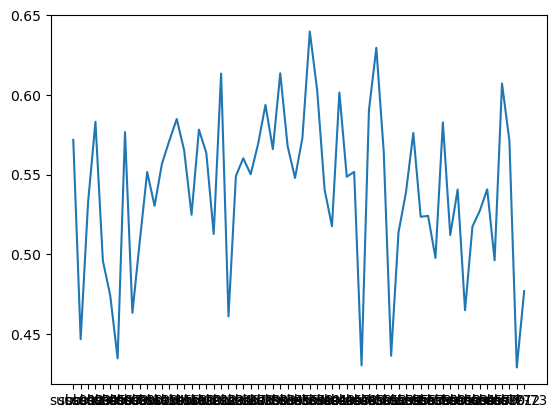

In [10]:
plt.plot(bbt.groupby('sub_id')['rt'].mean())

In [14]:
bbt.head()

,sub_id,index,block,left_stim,right_stim,left_value,right_value,shift,action,rt,...,stim1_prop_training,stim2_prop_training,stim_diff_prop_training,stim_diff_prop_training_chosen,reward1C,stim_diff_prop_trainingS,stim_diff_prop_training_chosenS,diff_valS,diff_val_chosenS,score_EHI
0,sub-01,0,learning1,5,7,3,4,0,1.0,0.934432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-01,1,learning1,4,6,3,4,1,1.0,0.645392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-01,2,learning1,3,1,2,1,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-01,3,learning1,6,8,4,5,0,1.0,0.368762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-01,4,learning1,2,4,2,3,0,1.0,0.537730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


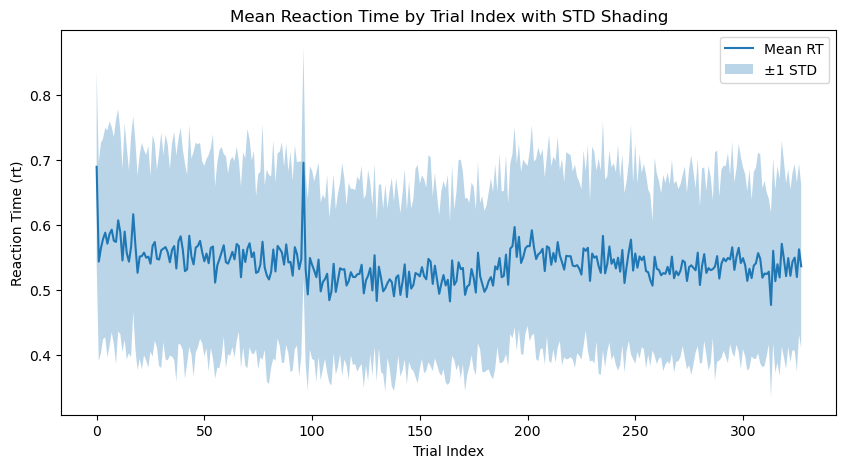

In [22]:
grouped = bbt.groupby('index')['rt']
mean_rt = grouped.mean()
std_rt = grouped.std()

valid = mean_rt.notna() & std_rt.notna()
plt.figure(figsize=(10, 5))
plt.plot(mean_rt.index[valid], mean_rt.values[valid], label='Mean RT')
plt.fill_between(
    mean_rt.index[valid],
    (mean_rt - std_rt)[valid],
    (mean_rt + std_rt)[valid],
    alpha=0.3,
    label='±1 STD'
)
plt.xlabel('Trial Index')
plt.ylabel('Reaction Time (rt)')
plt.title('Mean Reaction Time by Trial Index with STD Shading')
plt.legend()
plt.show()